In [58]:
import numpy as np
import math
import random
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


R = int(input("Enter the matrix size:"))
print()
'''
print("Enter the entries in a single line (separated by space) of a: ")
entries = list(map(int, input().split()))
x = np.array(entries).reshape(R, R)
print(x)
print("Enter the entries in a single line (separated by space) of b: ")
entries = list(map(int, input().split()))
y = np.array(entries).reshape(R, R)
print(y)
print()
'''
x = np.random.randint(5, size=(R,R))
y = np.random.randint(5, size=(R,R))
def usual(x,y):
    m = len(x)                                            # a: m × n
    c = [[None for __ in range(m)] for __ in range(m)]    # c: m × k
    for i in range(m):
        for j in range(m):       
            c[i][j] = sum(x[i][mm] * y[mm][j] for mm in range(m))
    return(c)

def optad0(w):
    if (w == 2):
        return 18
    elif (w==3) or (w==5)  or (w==9) or (w==13) or (w==21) or (w==17)  or (w==7):
        return w**2*(w-1)
    else:
        if (w%2 == 0):
            return 18*(w/2)**2 + 7*optad0(w/2)
        else:
            w = w+1
            return 18*(w/2)**2 + 7*optad0(w/2)
mul=R**3
s=R**2*(R-1)
step=math.log2(R)
step=math.ceil(step)
mulst= 7**step
sst=6*7**step - 6 *2**(2*step)
print(color.BOLD+"USUAL ALGORITHM FOR"+color.END, R)
print("Number of multiplications: ", mul)
print("Number of additions: ", s)
print("Coefficient usual: ", mul)
print()
print(color.BOLD+"STRASSEN ALGORITHM FOR"+color.END, R)
print("Number of multiplications: ", mulst)
print("Number of additions: ", sst)
print("Coefficient Strassen: ", mulst)
print()
optmul = 1
a=R
print(color.BOLD+"DIFFICULTY 0 OPTIMAL ALGORITHM FOR"+color.END, R)

'''while (R!=3) and (R!=5)  and (R!=9) and (R!=13) and (R!=21) and (R!=17)  and (R!=2) and (R!=7):
    optmul = 7*optmul
    if (R%2)==1:
        print(color.RED+"Add up to"+color.END, R+1)
    R=math.ceil(R/2)
    print(color.RED + "Strassen to " + color.END, R)
else:
    if R==2:
        optmul=optmul*7
        print(color.RED+ "Strassen to end"+color.END)
    else:
        m = R**3
        optmul = optmul*m
        print(R, color.RED+ "usual"+color.END)'''
        

oad = optad0(a)
print(color.BOLD+"Optimal multiplications: "+color.END, optmul)
print(color.BOLD+"Optimal additions: "+color.END, oad)
print(color.BOLD+"Optimal coeff: "+color.END, optmul)


Enter the matrix size:22

USUAL ALGORITHM FOR 22
Number of multiplications:  10648
Number of additions:  10164
Coefficient usual:  10648

STRASSEN ALGORITHM FOR 22
Number of multiplications:  16807
Number of additions:  94698
Coefficient Strassen:  16807

DIFFICULTY 0 OPTIMAL ALGORITHM FOR 22
Optimal multiplications:  1
Optimal additions:  20826.0
Optimal coeff:  1


In [59]:
# Функция которая считает количество
def calc(R):
    # USUAL ALGORITHM
    usual_multiplications = R**3
    usual_additions = R**2 * (R - 1)
    # STRASSEN ALGORITHM
    steps = math.ceil(math.log2(R))
    strassen_multiplications = 7**steps
    strassen_additions = 6 * 7**steps - 6 * 2**(2*steps)
    # DIFFICULTY (OPTIMAL) ALGORITHM
    optmul = 1
    a = R
    while (R!=3) and (R!=5)  and (R!=9) and (R!=13) and (R!=21) and (R!=17)  and (R!=2) and (R!=7):
        optmul = 7 * optmul
        R=math.ceil(R/2)
    else:
        if R==2:
            optmul=optmul*7
        else:
            m = R**3
            optmul = optmul*m
    oad = optad0(a)
    
    optimal_multiplications = optmul
    optimal_additions = oad
    return (usual_multiplications, usual_additions,
            strassen_multiplications, strassen_additions,
            optimal_multiplications, optimal_additions)

In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [61]:
Nmin = 2 # Нижняя граница размера матрицы
Nmax = 1000 # Верхняя граница размера матрицы

# Генерируем таблицу
a = np.zeros((Nmax - Nmin, 6 + 1), dtype=int)
for i, R in enumerate(range(Nmin, Nmax)):
    a[i,] = R, *calc(R)
df = pd.DataFrame(data=a, columns=[
    "R", "us_mul", "us_add", "strass_mul", "strass_add", "opt_mul", "opt_add"])

# Для того чтобы записать данные в файл разкоментируй строку
df.to_excel('dataset.xlsx', sheet_name='Data', index=False)

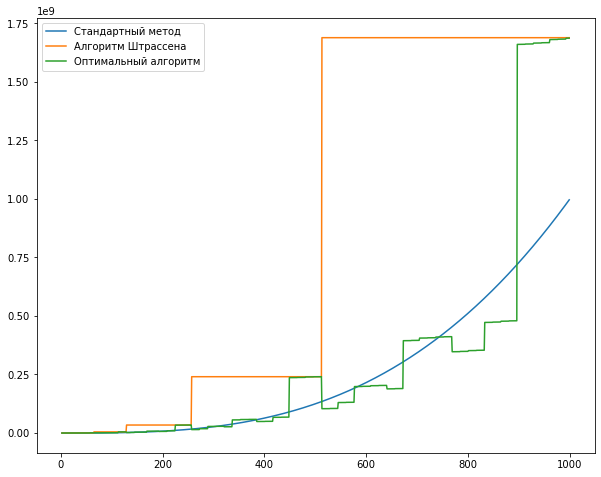

In [62]:
# SHOW RESULTS FOR ADDITIONS

plt.figure(figsize=(10, 8))
plt.plot(df['R'], df['us_add'], label='Стандартный метод')
plt.plot(df['R'], df['strass_add'], label='Алгоритм Штрассена')
plt.plot(df['R'], df['opt_add'], label='Оптимальный алгоритм')
plt.legend()
plt.show()

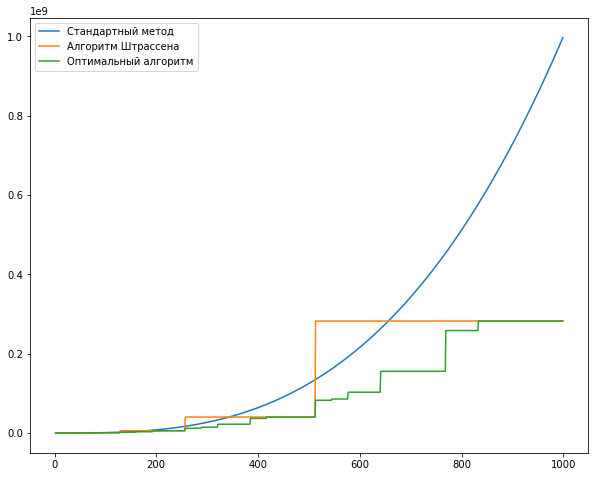

In [63]:
# SHOW RESULTS FOR MULTIPLICATIONS

plt.figure(figsize=(10, 8))
plt.plot(df['R'], df['us_mul'], label='Стандартный метод')
plt.plot(df['R'], df['strass_mul'], label='Алгоритм Штрассена')
plt.plot(df['R'], df['opt_mul'], label='Оптимальный алгоритм')
plt.legend()

## Генерация каталога

In [64]:
import json
def make_history(R):
    a = R
    hist = []
    optmul = 1
    while (R!=3) and (R!=5)  and (R!=9) and (R!=13) and (R!=21) and (R!=17)  and (R!=2) and (R!=7):
        optmul = 7*optmul
        if (R % 2) == 1:
            hist.append("Дополнить до " + str(R + 1))
        R=math.ceil(R/2)
        hist.append("Штрассеном до " + str(R))
    else:
        if R==2:
            optmul=optmul*7
            hist.append("Штрассеном до конца")
        else:
            m = R**3
            optmul = optmul*m
            hist.append("Стандратным до конца " + str(R))
            
    hist.append(f'Количество сложений: {optad0(a)}')
    hist.append(f'Количество умножений: {optmul}')
    return hist

In [65]:
make_history(643)

['Дополнить до 644',
 'Штрассеном до 322',
 'Штрассеном до 161',
 'Дополнить до 162',
 'Штрассеном до 81',
 'Дополнить до 82',
 'Штрассеном до 41',
 'Дополнить до 42',
 'Штрассеном до 21',
 'Стандратным до конца 21',
 'Количество сложений: 188594532.0',
 'Количество умножений: 155649627']

In [66]:
# Запись в файл
catalogy = dict()

for k in range(2, 1000):
    catalogy[k] = make_history(k)
    
with open('catalogy.txt', 'w') as file:
    json.dump(catalogy, file, indent=4, ensure_ascii=False)

In [67]:
# Чтение из каталога

with open('catalogy.txt', 'r') as file:
    cat = json.load(file)
    
cat['100'] # Ключ это строка

['Штрассеном до 50',
 'Штрассеном до 25',
 'Дополнить до 26',
 'Штрассеном до 13',
 'Стандратным до конца 13',
 'Количество сложений: 968412.0',
 'Количество умножений: 753571']

## График по данным

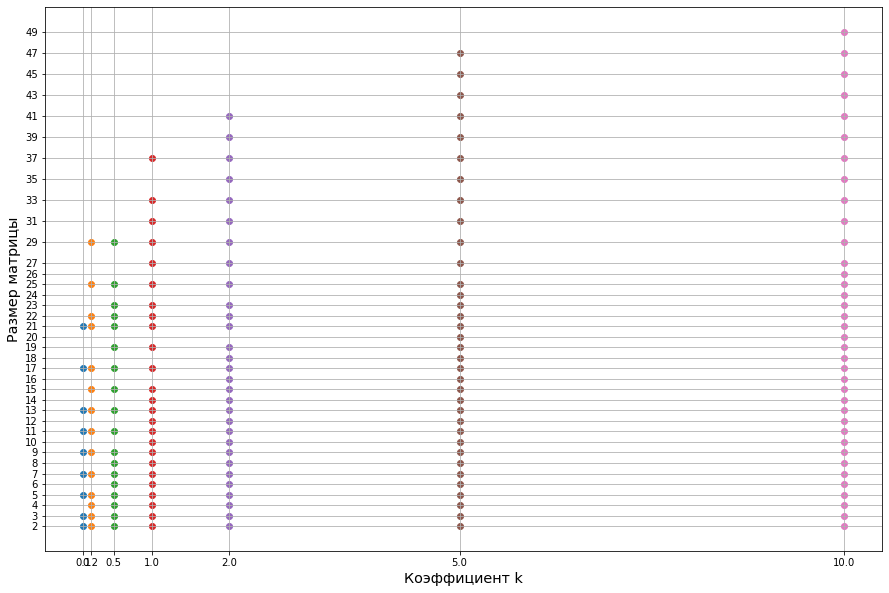

In [68]:
data = '''0.1=2 3 5 7 9 11 13 17 21
0.2=2 3 4 5 7 9 11 13 15 17 21 22 25 29
0.5=2 3 4 5 6 7 8 9 11 13 15 17 19 21 22 23 25 29
1.0=2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 19 21 22 23 25 27 29 31 33 37
2.0=2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 21 22 23 25 27 29 31 33 35 37 39 41
5.0=2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 27 29 31 33 35 37 39 41 43 45 47
10=2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 29 31 33 35 37 39 41 43 45 47 49'''
#50=2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 31 33 35 37 39 41 43 45 47 49 51'''

plt.figure(figsize=(15, 10))
plt.yticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
            16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 
            27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49])
plt.xticks([0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10])
plt.grid()

for line in data.split('\n'):
    x, other = line.split('=')
    x = float(x)
    
    y = list(map(int, other.split(' ')))
    x = [float(x) for i in range(len(y))]
    plt.scatter(x, y)
plt.xlabel("Коэффициент k",fontsize = 'x-large')
plt.ylabel(f"Размер матрицы", fontsize = 'x-large')  
plt.savefig('saved_figure_grid.png')


## Рассчет датасета

In [69]:
import numpy as np
import math
import random

def calculate_optimal(R, koef, Nums):
    def optad2(w):
        if w in Nums:
            return w**2*(w-1)
        else:
            if (w % 2 == 0):
                return 18*(w/2)**2 + 7*optad2(w/2)
            else:
                w = w+1
                return 18*(w/2)**2 + 7*optad2(w/2)
    
    a = R
    optmul, a1 = 1, a
    while a not in Nums:
        optmul = 7*optmul
        a = math.ceil(a / 2)
    else:
        if a == 2:
            optmul=optmul*8
        else:
            m = a**3
            optmul = optmul*m
            
    oad = optad2(a1)
    return optmul, oad, optmul+koef*oad

In [70]:
calculate_optimal(100, 0.1, [2, 3, 5, 7, 9, 11, 13, 17, 21])

(753571, 968412.0, 850412.2)

In [71]:
difficulties = [
    (0.1, [2, 3, 5, 7, 9, 11, 13, 17, 21]),
    (0.2, [2, 3, 4, 5, 7, 9, 11, 13, 15, 17, 21, 22, 25, 29]),
    (0.5, [2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 17, 19, 21, 22, 23, 25, 29]),
    (1.0, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22, 23, 25, 27, 29, 31, 33, 37]),
    (2.0, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41]),
    (5.0, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47]),
    (10, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]),
    (50, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]),
    (100, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]),
]

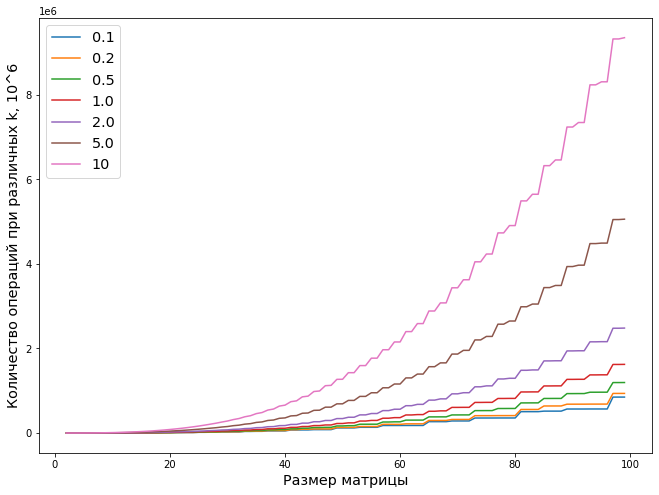

In [72]:
Nmin = 2 # Нижняя граница размера матрицы
Nmax = 100 # Верхняя граница размера матрицы

plt.figure(figsize=(11, 8))

for difficulty in difficulties:
    if difficulty[0] in [100, 50]: # Игнорируем значения
        continue
    # Генерируем таблицу
    a = np.zeros((Nmax - Nmin, 3 + 1), dtype=int)
    for i, R in enumerate(range(Nmin, Nmax)):
        a[i,] = R, *calculate_optimal(R, *difficulty)
        
    df = pd.DataFrame(data=a, columns=[
        "R", "opt_mul", "opt_add", "opt_koef"])
    df.to_excel(f'dataset_{difficulty[0]}.xlsx', sheet_name='Data', index=False)
    plt.plot(df['R'], df['opt_koef'], label=str(difficulty[0]))
plt.xlabel("Размер матрицы",fontsize = 'x-large')
plt.ylabel(f"Количество операций при различных k, 10^6", fontsize = 'x-large')
plt.legend(fontsize = 'x-large')
plt.savefig('saved_figure_opt_koef.png')

## Построение графиков

In [73]:
# Функция которая считает количество
def calculate_with_difficulties(R, koef, Nums):
    # USUAL ALGORITHM
    usual_multiplications = R**3
    usual_additions = R**2 * (R - 1)
    # STRASSEN ALGORITHM
    steps = math.ceil(math.log2(R))
    strassen_multiplications = 7**steps
    strassen_additions = 6 * 7**steps - 6 * 2**(2*steps)
    # DIFFICULTY (OPTIMAL) ALGORITHM
    optimal_multiplications, optimal_additions, _ = calculate_optimal(R, koef, Nums)
    
    return (usual_multiplications, usual_additions,
            strassen_multiplications, strassen_additions,
            optimal_multiplications, optimal_additions)

def make_table(Nmin, Nmax, koef, Nums):
    a = np.zeros((Nmax - Nmin, 6 + 1), dtype=int)
    for i, R in enumerate(range(Nmin, Nmax)):
        a[i,] = R, *calculate_with_difficulties(R, koef, Nums)
    return pd.DataFrame(data=a, columns=[
        "R", "us_mul", "us_add", "strass_mul", "strass_add", "opt_mul", "opt_add"])

In [74]:
def save_plot_for_k_Nums(koef, Nums, name):
    Nmin = 2
    Nmax = 100
    columns = [("us_mul", "us_add", "Стандартный метод"),
               ("strass_mul", "strass_add", "Алгоритм Штрассена"),
               ("opt_mul", "opt_add", "Оптимальный алгоритм")]
    plt.figure(figsize=(11, 8))
    plt.title(f'k = {k}')
    table = make_table(Nmin, Nmax, koef, Nums)
    
    for muls_name, adds_name, label in columns:
        plt.plot(table['R'], table[muls_name] + koef * table[adds_name], label=label)
    plt.xlabel("Размер матрицы")
    plt.ylabel(f"Количество операций при k = {k}, 10^6")
    plt.legend()
    plt.savefig(name)
    plt.close()

In [75]:
koefs = [0.1, 1, 10]

koeflib = {
    0.1: [2, 3, 5, 7, 9, 11, 13, 17, 21],
    1.0: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22, 23, 25, 27, 29, 31, 33, 37],
    10.0: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
}

for k in koeflib:
    save_plot_for_k_Nums(koef=k, Nums=koeflib[k], name=f'saved_figure_koef_{k}.png')
    